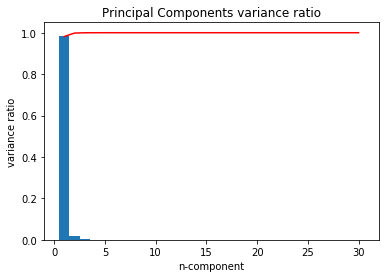

In [1]:
from Data_Visualization import Data_Visualization
from Data_Process import Data_Process

# principal components visulization
X, Y=Data_Process().get_data()
Data_Visualization().pca_vis(X)

the accuracy of the training set modeled by logistic regression is:  0.927230046948
the accuracy of the test set modeled by logistic regression is  0.944055944056
the F-score of the training set modeled by logistic regression is:  0.943327239488
the F-score of the test set modeled by logistic regression is  0.956043956044
{'training time': 0.26400017738342285, 'prediction time': 0.0}


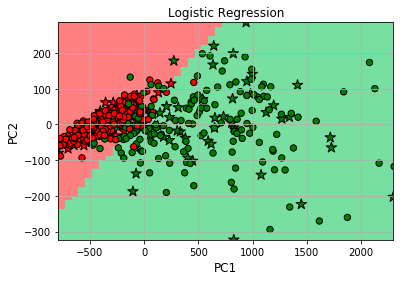

In [2]:
import numpy as np
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# perform decision logistic regression after feature reduction
if __name__=="__main__":

    time_results={}    # for calculate the time efficiency

    X, Y=Data_Process().get_data()
    X=Data_Process().feature_extract(X, 2)   # extract the first and second components
    X_train, X_test, y_train, y_test =Data_Process().data_split(X, Y)

    LR = LogisticRegression(random_state=0)
    # Exhaustive search over specified parameter values for an estimator.
    #  including the penalty term (L1 or L2)
    #  'C' means inverse of regularization strength. Like in support vector machines, smaller values specify stronger regularization.
    #  'fit_intercept' specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
    parameters={'penalty':['l1', 'l2'], 'C':[0.1, 1, 10], 'fit_intercept':[True, False]}
    scorer=make_scorer(accuracy_score)    # make accuracy as the evaluation metrics in parameeter tuning

    # data training (including parameter tuning)
    start1 = time()
    LR_obj=GridSearchCV(estimator=LR, param_grid=parameters, scoring=scorer)
    LR_fit=LR_obj.fit(X_train, y_train)
    LR_best=LR_fit.best_estimator_
    end1 = time()
    time_results['training time'] = end1 - start1

    # make prediction
    start2 = time()
    y_train_pred = LR_best.predict(X_train)
    y_test_pred = LR_best.predict(X_test)
    end2 = time()
    time_results['prediction time'] = end2 - start2

    # calculating the metrics
    train_accuracy = 1.0 * np.mean(y_train_pred == y_train)
    test_accuracy = 1.0 * np.mean(y_test_pred == y_test)
    train_fscore = f1_score(y_train, y_train_pred)
    test_fscore = f1_score(y_test, y_test_pred)

    print 'the accuracy of the training set modeled by logistic regression is: ', train_accuracy
    print 'the accuracy of the test set modeled by logistic regression is ', test_accuracy
    print 'the F-score of the training set modeled by logistic regression is: ', train_fscore
    print 'the F-score of the test set modeled by logistic regression is ', test_fscore
    print time_results

    # visualization
    Data_Visualization().classification_vis(LR_best, 0, X_train, X_test, y_train, y_test)

the accuracy of the training set modeled by SVC is:  0.934272300469
the accuracy of the test set modeled by SVC is  0.944055944056
the F-score of the training set modeled by SVC is:  0.949275362319
the F-score of the test set modeled by SVC is  0.956043956044
{'training time': 2.055000066757202, 'prediction time': 0.0}


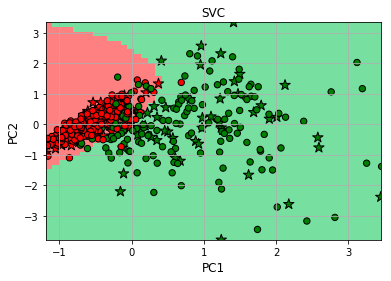

In [4]:
from sklearn.svm import SVC

# perform support vector classification after feature reduction
if __name__=="__main__":

    time_results = {}  # for calculate the time efficiency

    X, Y = Data_Process().get_data()
    X=Data_Process().feature_extract(X, 2)
    X=Data_Process().data_normalization(X)
    X_train, X_test, y_train, y_test=Data_Process().data_split(X, Y)

    svc = SVC(random_state=0)
    # Exhaustive search over specified parameter values for an estimator.
    #  including 'C': Penalty parameter of the error term. smaller values specify stronger regularization.
    #   'kernel': Specifies the kernel type to be used in the algorithm, including polynomial, gaussian and sigmoid
    #   'gamma': defines how far the influence of a single training example reaches, a small gamma value define a Gaussian function with a large variance
    parameters = {'C': [1, 10, 20, 50], 'kernel': ['poly', 'rbf', 'sigmoid'], 'gamma': [0.1, 0.01, 0.001, 0.0001]}
    scorer = make_scorer(accuracy_score)   # make accuracy as the evaluation metrics in parameeter tuning

    # data training (including parameter tuning)
    start1 = time()
    svc_obj=GridSearchCV(estimator=svc, param_grid=parameters, scoring=scorer)
    svc_fit=svc_obj.fit(X_train, y_train)
    svc_best = svc_fit.best_estimator_
    end1 = time()
    time_results['training time'] = end1 - start1

    # make prediction
    start2 = time()
    y_train_pred = svc_best.predict(X_train)
    y_test_pred = svc_best.predict(X_test)
    end2 = time()
    time_results['prediction time'] = end2 - start2

    # compute metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_fscore = f1_score(y_train, y_train_pred)
    test_fscore = f1_score(y_test, y_test_pred)

    print 'the accuracy of the training set modeled by SVC is: ', train_accuracy
    print 'the accuracy of the test set modeled by SVC is ', test_accuracy
    print 'the F-score of the training set modeled by SVC is: ', train_fscore
    print 'the F-score of the test set modeled by SVC is ', test_fscore
    print time_results

    # visualization
    Data_Visualization().classification_vis(svc_best, 2, X_train, X_test, y_train, y_test)

the accuracy of the training set modeled by Decision Tree is:  0.941314553991
the accuracy of the test set modeled by Decision Tree is  0.937062937063
the F-score of the training set modeled by Decision Tree is:  0.953789279113
the F-score of the test set modeled by Decision Tree is  0.949720670391
{'training time': 0.3839998245239258, 'prediction time': 0.0}


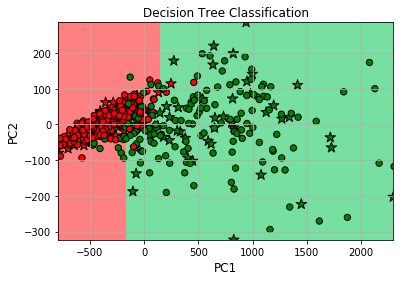

In [5]:
from sklearn.tree import DecisionTreeClassifier

# perform decision tree classification after feature reduction
if __name__=="__main__":

    time_results = {}    # for calculate the time efficiency

    X, Y = Data_Process().get_data()
    X=Data_Process().feature_extract(X, 2)
    X_train, X_test, y_train, y_test=Data_Process().data_split(X, Y)

    DTC = DecisionTreeClassifier(random_state=0)
    # Exhaustive search over specified parameter values for an estimator.
    #  including the criterion used (calculating gini or entropy), the selection of max features and max depth
    parameters = {'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'log2', None], 'max_depth': [3, 5, None]}
    scorer = make_scorer(accuracy_score)    # make accuracy as the evaluation metrics in parameeter tuning

    # data training (including parameter tuning)
    start1 = time()
    DTC_obj=GridSearchCV(estimator=DTC, param_grid=parameters, scoring=scorer)
    DTC_fit=DTC_obj.fit(X_train, y_train)
    DTC_best = DTC_fit.best_estimator_
    end1 = time()
    time_results['training time'] = end1 - start1

    # make prediction
    start2 = time()
    y_train_pred = DTC_best.predict(X_train)
    y_test_pred = DTC_best.predict(X_test)
    end2 = time()
    time_results['prediction time'] = end2 - start2

    # calculating the metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_fscore=f1_score(y_train, y_train_pred)
    test_fscore=f1_score(y_test, y_test_pred)

    print 'the accuracy of the training set modeled by Decision Tree is: ', train_accuracy
    print 'the accuracy of the test set modeled by Decision Tree is ', test_accuracy
    print 'the F-score of the training set modeled by Decision Tree is: ', train_fscore
    print 'the F-score of the test set modeled by Decision Tree is ', test_fscore
    print time_results

    # visualization
    Data_Visualization().classification_vis(DTC_best, 1, X_train, X_test, y_train, y_test)

the accuracy of the training set modeled by Random Forest is:  0.955399061033
the accuracy of the test set modeled by Random Forest is  0.958041958042
the F-score of the training set modeled by Random Forest is:  0.965265082267
the F-score of the test set modeled by Random Forest is  0.967032967033
{'training time': 70.46099996566772, 'prediction time': 0.125}


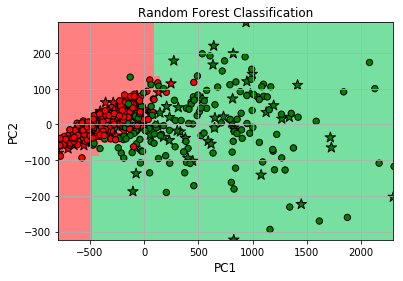

In [7]:
from sklearn.ensemble import RandomForestClassifier

# perform random forest classification after feature reduction
if __name__=="__main__":

    time_results = {} # for calculate the time efficiency

    X, Y = Data_Process().get_data()
    X=Data_Process().feature_extract(X, 2)
    X_train, X_test, y_train, y_test=Data_Process().data_split(X, Y)

    RFC = RandomForestClassifier(random_state=0)
    # Exhaustive search over specified parameter values for an estimator.
    #  including 'n_estimators': The number of trees in the forest. The criterion used for calculation, and the max depth the trees reach
    parameters = {'n_estimators': [50, 100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, None]}
    scorer = make_scorer(accuracy_score)   # make accuracy as the evaluation metrics in parameeter tuning

    # data training (including parameter tuning)
    start1 = time()
    RFC_obj=GridSearchCV(estimator=RFC, param_grid=parameters, scoring=scorer)
    RFC_fit=RFC_obj.fit(X_train, y_train)
    RFC_best = RFC_fit.best_estimator_
    end1 = time()
    time_results['training time'] = end1 - start1

    # make prediction
    start2 = time()
    y_train_pred = RFC_best.predict(X_train)
    y_test_pred = RFC_best.predict(X_test)
    end2 = time()
    time_results['prediction time'] = end2 - start2

    # calculate the metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_fscore = f1_score(y_train, y_train_pred)
    test_fscore = f1_score(y_test, y_test_pred)

    print 'the accuracy of the training set modeled by Random Forest is: ', train_accuracy
    print 'the accuracy of the test set modeled by Random Forest is ', test_accuracy
    print 'the F-score of the training set modeled by Random Forest is: ', train_fscore
    print 'the F-score of the test set modeled by Random Forest is ', test_fscore
    print time_results

    # visualization
    Data_Visualization().classification_vis(RFC_best, 3, X_train, X_test, y_train, y_test)